In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training data
train_df = pd.read_csv('/content/sign_mnist_train.csv')
test_df = pd.read_csv('/content/sign_mnist_test.csv')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()


Train shape: (27455, 785)
Test shape: (7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


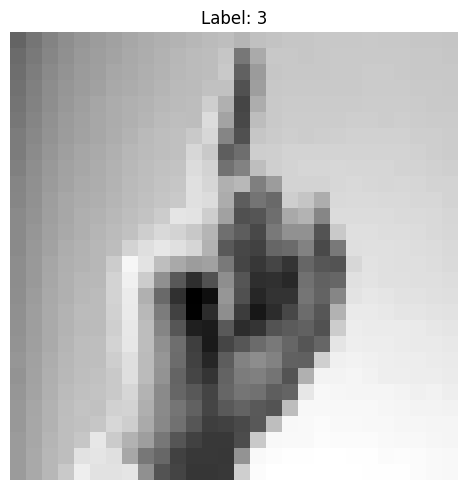

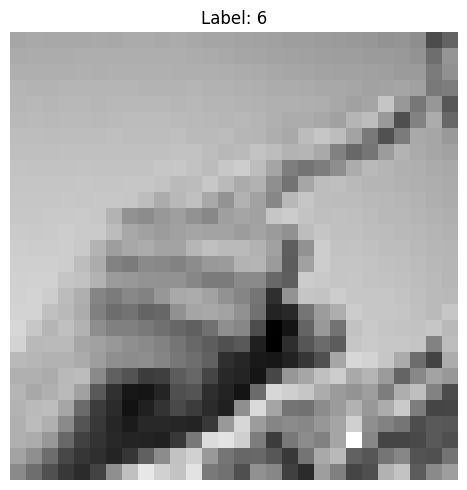

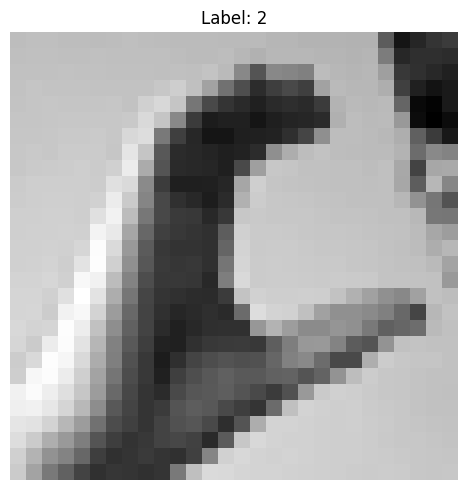

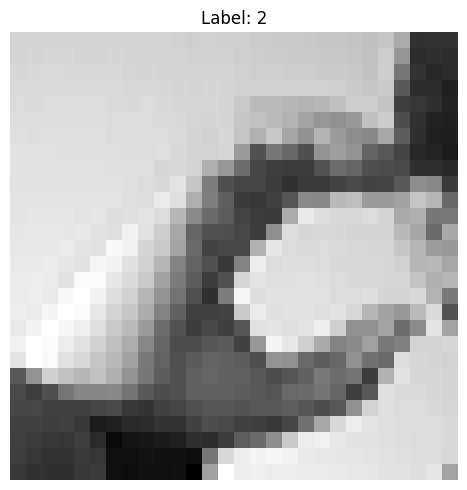

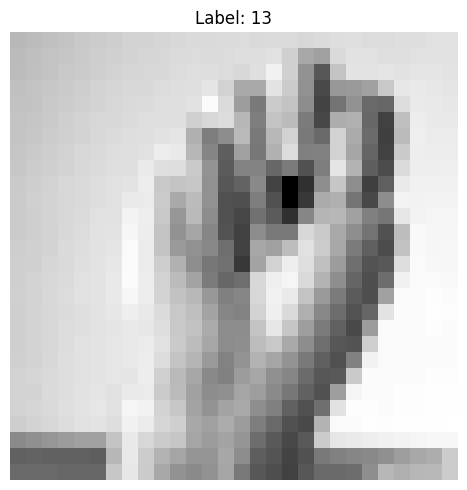

In [5]:
import numpy as np

# Visualize the first 5 images
for i in range(5):
    label = train_df.iloc[i, 0]
    pixels = train_df.iloc[i, 1:].values.reshape(28, 28)

    plt.figure(figsize=(5, 5))  # Bigger display
    plt.title(f"Label: {label}")
    plt.imshow(pixels, cmap='gray', interpolation='nearest')  # No smoothing
    plt.axis('off')
    plt.tight_layout()
    plt.show()



In [6]:
#preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

# Split X and y
X = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1)
X = X / 255.0  # normalize pixel values

y = to_categorical(train_df['label'].values)

# Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
#CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(25, activation='softmax')  # 26 letters
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,969 (886.60 KB)

 Trainable params: 226,969 (886.60 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_val, y_val),
                    batch_size=64)


Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3654 - loss: 2.1943 - val_accuracy: 0.8831 - val_loss: 0.4041
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8942 - loss: 0.3395 - val_accuracy: 0.9769 - val_loss: 0.1082
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9655 - loss: 0.1198 - val_accuracy: 0.9969 - val_loss: 0.0262
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9860 - loss: 0.0565 - val_accuracy: 0.9969 - val_loss: 0.0175
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9899 - loss: 0.0379 - val_accuracy: 0.9971 - val_loss: 0.0137
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9913 - loss: 0.0292 - val_accuracy: 0.9975 - val_loss: 0.0086
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9943 - loss: 0.0194 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9941 - loss: 0.0222 - val_accuracy: 0

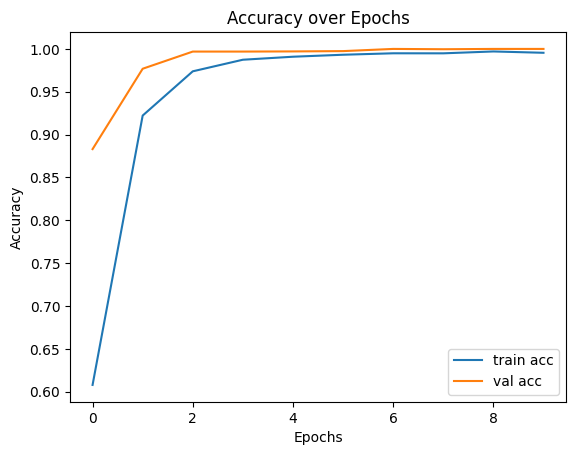

In [11]:
#plot training history

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [13]:
model.save('sign_model.keras')
